In [2]:
import csv
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('算法前端-北京上海杭州.csv', header=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            1844 non-null   object
 1   area            1844 non-null   object
 2   profession      1844 non-null   object
 3   professionName  1844 non-null   object
 4   experience      1844 non-null   object
 5   education       1844 non-null   object
 6   wageStart       1844 non-null   int64 
 7   wageEnd         1844 non-null   int64 
 8   companyName     1844 non-null   object
 9   companyType     1844 non-null   object
 10  companySize     1844 non-null   object
 11  industry        1844 non-null   object
 12  tags            1835 non-null   object
 13  welfare         1844 non-null   object
 14  url             1844 non-null   object
 15  submitTime      1844 non-null   object
dtypes: int64(2), object(14)
memory usage: 230.6+ KB


In [5]:
wageDF = df[['city', 'profession', 'experience','education', 'wageStart', 'wageEnd', 'companyType', 'companySize' ]]
wageDF = wageDF[wageDF['experience']!='1年以下']
wageDF = wageDF[wageDF['education']!='不限']
wageDF = wageDF[wageDF['companySize']!='少于15人']

In [6]:
pd.set_option('max_rows',200)
wageDF.groupby(['profession','city', 'experience', 'education', 'companyType', 'companySize']).agg(['count'])

wageStart wageEnd
                                                                 count   count
profession city experience education companyType companySize                  
前端工程师      上海   1-3年       大专        A轮          15-50人              1       1
                                                 50-150人             2       2
                           本科        A轮          15-50人              1       1
                                                 2000人以上             1       1
                                                 50-150人             4       4
...                                                                ...     ...
算法工程师      杭州   5-10年      硕士        B轮          150-500人            3       3
                                                 50-150人             1       1
                                     C轮          150-500人            1       1
                                     上市公司        2000人以上             2       2
                                                 500-2000人           2       2

[429 rows x 2 columns]

In [7]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'p_%s' % n
    return percentile_

In [8]:
wageDF.groupby(['profession','city']).agg(['count'])

experience education wageStart wageEnd companyType companySize
                     count     count     count   count       count       count
profession city                                                               
前端工程师      上海          139       139       139     139         139         139
           北京          394       394       394     394         394         394
           杭州          299       299       299     299         299         299
算法工程师      上海          358       358       358     358         358         358
           北京          321       321       321     321         321         321
           杭州          256       256       256     256         256         256

In [9]:
wageDF.groupby(['profession','experience']).agg(['count'])

city education wageStart wageEnd companyType  \
                      count     count     count   count       count   
profession experience                                                 
前端工程师      1-3年         212       212       212     212         212   
           3-5年         501       501       501     501         501   
           5-10年        119       119       119     119         119   
算法工程师      1-3年         250       250       250     250         250   
           3-5年         554       554       554     554         554   
           5-10年        131       131       131     131         131   

                      companySize  
                            count  
profession experience              
前端工程师      1-3年               212  
           3-5年               501  
           5-10年              119  
算法工程师      1-3年               250  
           3-5年               554  
           5-10年              131

In [10]:
wageDF.groupby(['profession','education']).agg(['count'])

city experience wageStart wageEnd companyType  \
                     count      count     count   count       count   
profession education                                                  
前端工程师      大专           64         64        64      64          64   
           本科          768        768       768     768         768   
算法工程师      博士            2          2         2       2           2   
           本科          682        682       682     682         682   
           硕士          251        251       251     251         251   

                     companySize  
                           count  
profession education              
前端工程师      大专                 64  
           本科                768  
算法工程师      博士                  2  
           本科                682  
           硕士                251

In [11]:
wageDF.groupby(['profession','companyType']).agg(['count'])

city experience education wageStart wageEnd  \
                       count      count     count     count   count   
profession companyType                                                
前端工程师      A轮            168        168       168       168     168   
           B轮            159        159       159       159     159   
           C轮             77         77        77        77      77   
           D轮及以上          95         95        95        95      95   
           上市公司          277        277       277       277     277   
           天使轮            56         56        56        56      56   
算法工程师      A轮            156        156       156       156     156   
           B轮            149        149       149       149     149   
           C轮             85         85        85        85      85   
           D轮及以上         178        178       178       178     178   
           上市公司          331        331       331       331     331   
           天使轮            36         36        36        36      36   

                       companySize  
                             count  
profession companyType              
前端工程师      A轮                  168  
           B轮                  159  
           C轮                   77  
           D轮及以上                95  
           上市公司                277  
           天使轮                  56  
算法工程师      A轮                  156  
           B轮                  149  
           C轮                   85  
           D轮及以上               178  
           上市公司                331  
           天使轮                  36

In [12]:
wageDF.groupby(['profession','companySize']).agg(['count'])

city experience education wageStart wageEnd  \
                       count      count     count     count   count   
profession companySize                                                
前端工程师      15-50人         77         77        77        77      77   
           150-500人      177        177       177       177     177   
           2000人以上       232        232       232       232     232   
           50-150人       156        156       156       156     156   
           500-2000人     190        190       190       190     190   
算法工程师      15-50人         52         52        52        52      52   
           150-500人      175        175       175       175     175   
           2000人以上       392        392       392       392     392   
           50-150人       128        128       128       128     128   
           500-2000人     188        188       188       188     188   

                       companyType  
                             count  
profession companySize              
前端工程师      15-50人               77  
           150-500人            177  
           2000人以上             232  
           50-150人             156  
           500-2000人           190  
算法工程师      15-50人               52  
           150-500人            175  
           2000人以上             392  
           50-150人             128  
           500-2000人           188

In [13]:
wageDF.groupby(['profession','city', 'experience']).agg(['count', 'mean', percentile(25), percentile(50), percentile(75)])

wageStart                              wageEnd  \
                               count       mean  p_25 p_50   p_75   count   
profession city experience                                                  
前端工程师      上海   1-3年              42  12.119048  10.0   12  14.75      42   
                3-5年              85  16.247059  15.0   15  20.00      85   
                5-10年             12  21.333333  19.5   20  25.00      12   
           北京   1-3年              91  13.912088  10.0   13  15.00      91   
                3-5年             229  17.956332  15.0   18  20.00     229   
                5-10年             74  24.648649  20.0   25  25.00      74   
           杭州   1-3年              79  11.240506   8.5   10  13.00      79   
                3-5年             187  16.288770  15.0   15  20.00     187   
                5-10年             33  21.969697  20.0   20  25.00      33   
算法工程师      上海   1-3年             112  21.750000  18.0   20  25.00     112   
                3-5年             208  25.572115  20.0   25  30.00     208   
                5-10年             38  33.263158  30.0   30  40.00      38   
           北京   1-3年              67  21.164179  15.0   20  25.00      67   
                3-5年             204  25.622549  20.0   25  30.00     204   
                5-10年             50  32.240000  25.0   30  38.75      50   
           杭州   1-3年              71  18.943662  15.0   18  20.00      71   
                3-5年             142  24.323944  20.0   25  30.00     142   
                5-10年             43  30.790698  25.0   30  30.00      43   

                                                         
                                 mean   p_25 p_50  p_75  
profession city experience                               
前端工程师      上海   1-3年        19.928571  15.00   20  22.0  
                3-5年        27.223529  20.00   25  30.0  
                5-10年       35.833333  30.00   35  37.5  
           北京   1-3年        23.923077  18.00   20  30.0  
                3-5年        30.860262  25.00   30  40.0  
                5-10年       40.500000  30.50   40  50.0  
           杭州   1-3年        18.721519  15.00   16  20.5  
                3-5年        27.967914  22.00   25  30.0  
                5-10年       36.636364  30.00   35  40.0  
算法工程师      上海   1-3年        39.000000  30.00   40  50.0  
                3-5年        47.105769  40.00   50  60.0  
                5-10年       58.289474  50.00   60  65.0  
           北京   1-3年        37.791045  30.00   40  40.0  
                3-5年        45.764706  40.00   45  50.0  
                5-10年       56.500000  41.25   50  65.0  
           杭州   1-3年        33.253521  25.00   30  40.0  
                3-5年        43.612676  35.00   40  50.0  
                5-10年       53.534884  42.50   50  60.0

In [14]:
wageDF = wageDF[wageDF['experience']!='5-10年']
wageDF.groupby(['profession','city', 'experience','education']).agg(['count', 'mean', percentile(25), percentile(50), percentile(75)])

wageStart                                 \
                                         count       mean   p_25  p_50   p_75   
profession city experience education                                            
前端工程师      上海   1-3年       大专                3  12.666667  11.50  13.0  14.00   
                           本科               39  12.076923  10.00  12.0  14.50   
                3-5年       大专                6  12.833333  10.50  13.5  15.00   
                           本科               79  16.506329  15.00  15.0  20.00   
           北京   1-3年       大专                8  11.125000   8.00  12.5  13.00   
                           本科               83  14.180723  10.00  13.0  15.50   
                3-5年       大专               19  13.000000  11.00  13.0  15.00   
                           本科              210  18.404762  15.00  18.0  20.00   
           杭州   1-3年       大专               13  10.692308  10.00  10.0  11.00   
                           本科               66  11.348485   8.25  10.0  13.75   
                3-5年       大专               11  12.454545  10.00  13.0  15.00   
                           本科              176  16.528409  15.00  15.0  20.00   
算法工程师      上海   1-3年       博士                1  30.000000  30.00  30.0  30.00   
                           本科               77  21.831169  16.00  20.0  25.00   
                           硕士               34  21.323529  19.25  20.0  25.00   
                3-5年       本科              153  25.241830  20.00  25.0  30.00   
                           硕士               55  26.490909  20.00  25.0  30.00   
           北京   1-3年       博士                1  18.000000  18.00  18.0  18.00   
                           本科               39  22.025641  18.00  20.0  25.00   
                           硕士               27  20.037037  15.00  20.0  25.00   
                3-5年       本科              163  25.650307  20.00  25.0  30.00   
                           硕士               41  25.512195  20.00  25.0  30.00   
           杭州   1-3年       本科               47  18.617021  15.00  18.0  20.00   
                           硕士               24  19.583333  15.00  18.5  24.25   
                3-5年       本科              100  23.750000  20.00  24.0  30.00   
                           硕士               42  25.690476  21.25  25.0  30.00   

                                     wageEnd                               
                                       count       mean  p_25  p_50  p_75  
profession city experience education                                       
前端工程师      上海   1-3年       大专              3  17.666667  16.5  18.0  19.0  
                           本科             39  20.102564  15.0  20.0  23.0  
                3-5年       大专              6  18.333333  15.0  17.5  20.0  
                           本科             79  27.898734  23.0  25.0  30.0  
           北京   1-3年       大专              8  15.875000  13.5  16.0  18.5  
                           本科             83  24.698795  18.0  20.0  30.0  
                3-5年       大专             19  21.736842  17.0  22.0  25.0  
                           本科            210  31.685714  25.0  30.0  40.0  
           杭州   1-3年       大专             13  16.538462  15.0  15.0  21.0  
                           本科             66  19.151515  15.0  16.0  20.0  
                3-5年       大专             11  20.272727  16.5  20.0  22.5  
                           本科            176  28.448864  24.0  25.0  30.0  
算法工程师      上海   1-3年       博士              1  50.000000  50.0  50.0  50.0  
                           本科             77  39.584416  30.0  40.0  50.0  
                           硕士             34  37.352941  30.0  40.0  40.0  
                3-5年       本科            153  46.503268  40.0  50.0  60.0  
                           硕士             55  48.781818  40.0  50.0  60.0  
           北京   1-3年       博士              1  30.000000  30.0  30.0  30.0  
                           本科             39  38.358974  30.0  35.0  40.0  
               

In [15]:
wageDF.groupby(['profession', 'experience','companyType']).agg(['count', 'mean', percentile(25), percentile(50), percentile(75)])

wageStart                                 \
                                      count       mean   p_25  p_50   p_75   
profession experience companyType                                            
前端工程师      1-3年       A轮                 54  11.981481  10.00  11.5  15.00   
                      B轮                 36  11.861111  10.00  11.0  14.25   
                      C轮                 21  12.714286  10.00  12.0  15.00   
                      D轮及以上              14  17.357143  15.00  16.0  20.00   
                      上市公司               69  12.797101  10.00  12.0  15.00   
                      天使轮                18  10.888889   8.00  10.0  13.25   
           3-5年       A轮                 98  16.061224  15.00  15.0  18.00   
                      B轮                 98  16.489796  15.00  15.0  20.00   
                      C轮                 47  16.978723  15.00  15.0  18.00   
                      D轮及以上              67  18.552239  15.00  20.0  20.00   
                      上市公司              158  17.867089  13.25  15.5  20.00   
                      天使轮                33  14.696970  12.00  15.0  15.00   
算法工程师      1-3年       A轮                 53  19.584906  15.00  20.0  20.00   
                      B轮                 42  19.380952  15.00  20.0  23.75   
                      C轮                 23  19.913043  17.00  20.0  20.00   
                      D轮及以上              48  21.770833  19.50  20.0  25.00   
                      上市公司               71  22.295775  18.00  20.0  25.00   
                      天使轮                13  20.076923  15.00  20.0  25.00   
           3-5年       A轮                 80  22.962500  20.00  24.0  25.00   
                      B轮                 89  24.606742  20.00  25.0  30.00   
                      C轮                 47  26.148936  20.00  25.0  30.00   
                      D轮及以上             113  26.955752  25.00  25.0  30.00   
                      上市公司              207  25.004831  20.00  25.0  30.00   
                      天使轮                18  29.000000  22.75  25.0  33.75   

                                  wageEnd                                
                                    count       mean   p_25 p_50   p_75  
profession experience companyType                                        
前端工程师      1-3年       A轮               54  19.611111  15.00   18  23.50  
                      B轮               36  20.805556  15.75   19  24.25  
                      C轮               21  21.095238  18.00   20  22.00  
                      D轮及以上            14  30.857143  22.25   29  40.00  
                      上市公司             69  21.492754  15.00   20  24.00  
                      天使轮              18  18.166667  15.00   16  20.00  
           3-5年       A轮               98  27.285714  22.00   25  30.00  
                      B轮               98  28.775510  25.00   28  30.00  
                      C轮               47  28.723404  25.00   25  30.00  
                      D轮及以上            67  32.492537  25.00   30  40.00  
                      上市公司            158  30.322785  20.00   30  40.00  
                      天使轮              33  24.212121  20.00   24  30.00  
算法工程师      1-3年       A轮               53  36.226415  30.00   40  40.00  
                      B轮               42  35.928571  30.00   35  40.00  
                      C轮               23  34.043478  25.50   35  40.00  
                      D轮及以上            48  40.375000  30.00   40  50.00  
                      上市公司             71  36.985915  30.00   35  40.00  
                      天使轮              13  37.307692  30.00   40  45.00  
           3-5年       A轮               80  40.125000  30.00   40  50.00  
                      B轮               89  43.842697  35.00   40  50.00  
                      C轮               47  45.106383  36.50   45  50.00  
                      D轮及以上           113  50.805310  40.00   50  60.00  
                      上市公司            207  45.555556  39.00   45  56.00  
   

In [16]:
wageDF.groupby(['profession','experience', 'companySize']).agg(['count', 'mean', percentile(25), percentile(50), percentile(75)])

wageStart                              \
                                      count       mean p_25  p_50  p_75   
profession experience companySize                                         
前端工程师      1-3年       15-50人             27  11.037037    9  10.0  13.0   
                      150-500人           42  11.714286   10  11.5  15.0   
                      2000人以上            40  15.475000   11  15.0  20.0   
                      50-150人            57  11.894737   10  11.0  15.0   
                      500-2000人          46  12.521739   10  12.0  15.0   
           3-5年       15-50人             44  15.181818   14  15.0  17.0   
                      150-500人          109  16.302752   15  15.0  18.0   
                      2000人以上           148  18.608108   15  20.0  20.0   
                      50-150人            82  16.000000   14  15.0  19.5   
                      500-2000人         118  17.186441   15  15.0  20.0   
算法工程师      1-3年       15-50人             21  19.809524   15  20.0  20.0   
                      150-500人           60  19.250000   15  19.0  20.0   
                      2000人以上            93  22.978495   20  20.0  25.0   
                      50-150人            41  18.780488   15  20.0  20.0   
                      500-2000人          35  20.600000   15  20.0  25.0   
           3-5年       15-50人             23  25.347826   20  25.0  27.5   
                      150-500人           89  23.640449   20  20.0  25.0   
                      2000人以上           251  26.494024   20  25.0  30.0   
                      50-150人            73  24.589041   20  25.0  30.0   
                      500-2000人         118  24.305085   20  25.0  30.0   

                                  wageEnd                              
                                    count       mean p_25  p_50  p_75  
profession experience companySize                                      
前端工程师      1-3年       15-50人           27  18.037037   15  16.0  20.0  
                      150-500人         42  20.023810   15  20.0  23.5  
                      2000人以上          40  27.375000   18  23.5  40.0  
                      50-150人          57  19.947368   15  18.0  22.0  
                      500-2000人        46  20.282609   15  18.0  24.0  
           3-5年       15-50人           44  24.863636   20  25.0  30.0  
                      150-500人        109  27.091743   24  25.0  30.0  
                      2000人以上         148  32.851351   24  30.0  40.0  
                      50-150人          82  27.524390   24  25.0  30.0  
                      500-2000人       118  29.194915   25  30.0  35.0  
算法工程师      1-3年       15-50人           21  35.523810   28  40.0  40.0  
                      150-500人         60  35.033333   28  34.5  40.0  
                      2000人以上          93  39.537634   30  35.0  50.0  
                      50-150人          41  35.024390   30  33.0  40.0  
                      500-2000人        35  37.142857   30  35.0  40.0  
           3-5年       15-50人           23  43.260870   35  40.0  50.0  
                      150-500人         89  41.876404   30  40.0  50.0  
                      2000人以上         251  49.223108   40  50.0  60.0  
                      50-150人          73  42.931507   35  40.0  50.0  
                      500-2000人       118  43.355932   35  40.0  50.0

In [17]:
# areaDF = df[['city', 'profession', 'experience','education', 'wageStart', 'wageEnd', 'companyType', 'companySize', 'area' ]]
areaDF = df[['city', 'profession','area' ]]

In [20]:
import smopy
hz = smopy.Map((30.2, 119.85, 30.35, 120.25),z=11)

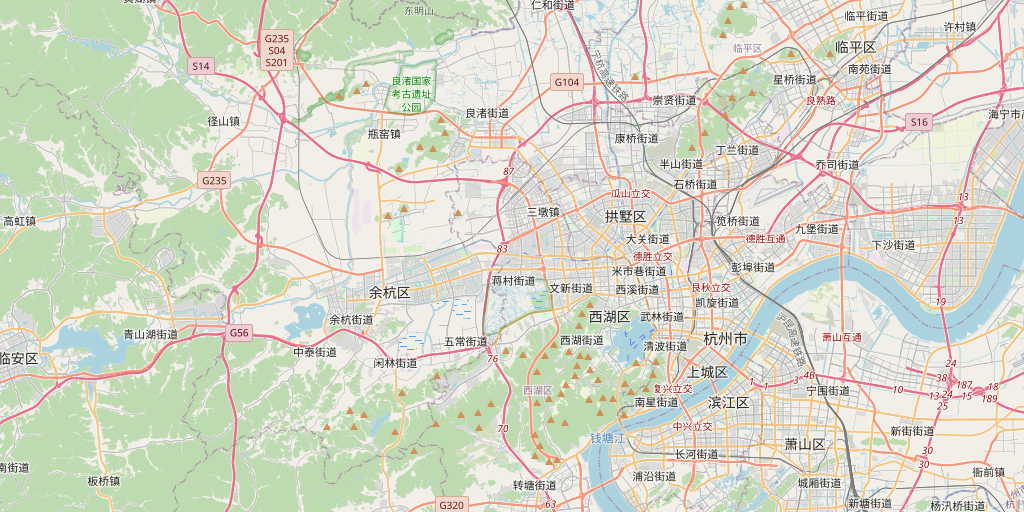

In [21]:
hz.show_ipython()

In [22]:
areaDF[areaDF['city']=='杭州'][['area', 'profession']].groupby(['area']).count().sort_values(['profession'],ascending=False)

,profession
area,
余杭区,134
西湖区,95
西溪,76
滨江区,57
西兴,34
拱墅区,27
长河,20
仓前,19
古荡,11


In [23]:
areaDict = {
    '西溪': {'y': 30.2579021, 'x': 120.1353813},
    '西兴': {'y': 30.1872382, 'x': 120.2239848},
    '长河': {'y': 30.1778663, 'x': 120.1814368},
    '仓前': {'y': 30.2880473, 'x': 119.9881408},
    '古荡': {'y': 30.2768983, 'x': 120.1100208},
}
areaDict

{'西溪': {'y': 30.2579021, 'x': 120.1353813},
 '西兴': {'y': 30.1872382, 'x': 120.2239848},
 '长河': {'y': 30.1778663, 'x': 120.1814368},
 '仓前': {'y': 30.2880473, 'x': 119.9881408},
 '古荡': {'y': 30.2768983, 'x': 120.1100208}}

In [24]:
drawArea = areaDF[areaDF['city']=='杭州'][['area', 'profession']].groupby(['area']).count().sort_values(['profession'],ascending=False).to_dict('index')
drawArea

{'余杭区': {'profession': 134},
 '西湖区': {'profession': 95},
 '西溪': {'profession': 76},
 '滨江区': {'profession': 57},
 '西兴': {'profession': 34},
 '拱墅区': {'profession': 27},
 '长河': {'profession': 20},
 '仓前': {'profession': 19},
 '古荡': {'profession': 11},
 '西湖': {'profession': 11},
 '萧山区': {'profession': 10},
 '古墩路': {'profession': 9},
 '江南': {'profession': 7},
 '浦沿': {'profession': 5},
 '江干区': {'profession': 5},
 '近江': {'profession': 5},
 '宁围': {'profession': 4},
 '文三路': {'profession': 3},
 '翠苑': {'profession': 3},
 '白杨': {'profession': 3},
 '上城区': {'profession': 3},
 '文一路': {'profession': 3},
 '开发区': {'profession': 3},
 '建设二路': {'profession': 3},
 '天目山路': {'profession': 3},
 '临平': {'profession': 3},
 '朝晖': {'profession': 2},
 '杭州': {'profession': 2},
 '小河': {'profession': 2},
 '天水': {'profession': 2},
 '下沙': {'profession': 2},
 '钱塘区': {'profession': 1},
 '闲林': {'profession': 1},
 '黄龙': {'profession': 1},
 '钱江新城': {'profession': 1},
 '无': {'profession': 1},
 '下城区': {'profession': 1},
 '彭埠': {

In [25]:
for key in areaDict:
    areaDict[key]['value']=drawArea[key]['profession']
areaDict

{'西溪': {'y': 30.2579021, 'x': 120.1353813, 'value': 76},
 '西兴': {'y': 30.1872382, 'x': 120.2239848, 'value': 34},
 '长河': {'y': 30.1778663, 'x': 120.1814368, 'value': 20},
 '仓前': {'y': 30.2880473, 'x': 119.9881408, 'value': 19},
 '古荡': {'y': 30.2768983, 'x': 120.1100208, 'value': 11}}

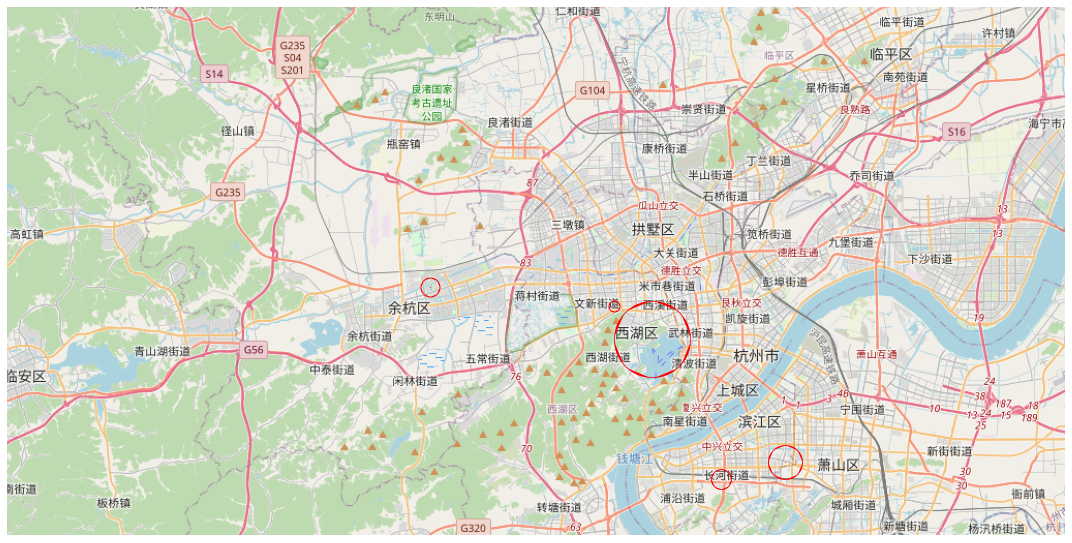

In [26]:
ax = hz.show_mpl(figsize=(15, 15))
for key in areaDict:
    x, y = hz.to_pixels(areaDict[key]['y'], areaDict[key]['x'])
    ax.plot(x, y, 'or', ms=1, mew=(areaDict[key]['value']))

In [73]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [32]:
wordDF = df[['city', 'profession', 'companyType', 'companySize','welfare', 'tags', 'industry' ]]

In [33]:
wordDF

,city,profession,companyType,companySize,welfare,tags,industry
0,上海,算法工程师,上市公司,2000人以上,“成长空间大、福利待遇好”,科技金融; 文本生成; 深度学习; 数据挖掘; 图片识别,科技金融
1,上海,算法工程师,A轮,50-150人,“年终奖金 绩效奖金 五险一金 餐饮补贴”,人脸识别,其他
2,上海,算法工程师,A轮,50-150人,“14-20薪、有期权”,人工智能服务; 自然语言处理,人工智能、其他
3,上海,算法工程师,上市公司,2000人以上,“环境舒适、晋升快速”,物流; 移动互联网,物流｜运输
4,上海,算法工程师,B轮,15-50人,“落户快 团队背景优秀 福利好”,优先上海落户; 免费午餐晚餐; 技术大牛众多; 名校名企背景,人工智能服务
...,...,...,...,...,...,...,...
1839,上海,前端工程师,上市公司,500-2000人,“待遇好、上升空间”,教育,教育、培训
1840,上海,前端工程师,A轮,150-500人,“弹性时间 发展空间 团队氛围 节日福利”,电商平台; IT技术服务、咨询; Vue; React; Web前端,IT技术服务、咨询
1841,上海,前端工程师,上市公司,150-500人,“五险一金、带薪年假、员工旅游、下午茶公司团建”,游戏; 企业服务; React,游戏
1842,上海,前端工程师,A轮,150-500人,“技术大牛 弹性办公 发展空间 节日福利”,电商平台; 软件服务、咨询; Web前端; Vue; React,IT技术服务、咨询


In [127]:
welfare = wordDF[wordDF['profession']=='算法工程师']['welfare'].tolist()
tags = wordDF[wordDF['profession']=='算法工程师']['tags'].dropna().tolist()
industry = wordDF[wordDF['profession']=='算法工程师']['industry'].tolist()

In [136]:
welfareStr = ' '.join(welfare).replace('“','').replace('”','')
tagsStr = ' '.join(tags)
industryStr = ' '.join(industry)

In [132]:
#-*-coding:utf-8-*-
# 绘制词云图
wc = WordCloud(
    background_color='white',  # 设置背景颜色，与图片的背景色相关
    max_words=2000,  # 设置最大显示的字数
    width=1200,              #设置图片的宽度
    height=800,              #设置图片的高度
    stopwords={'大'},  # 设置停用词，停用词则不再词云图中表示
    max_font_size=150,  # 设置字体最大值
    min_font_size=8,
    random_state=10,  # 设置有多少种随机生成状态，即有多少种配色方案
    scale=1,  # 设置生成的词云图的大小
    font_path='仿宋_GB2312.ttf'
)

In [116]:
# 传入需画词云图的文本
wc.generate(welfareStr)

In [133]:
wc.generate(tagsStr)

In [137]:
wc.generate(industryStr)

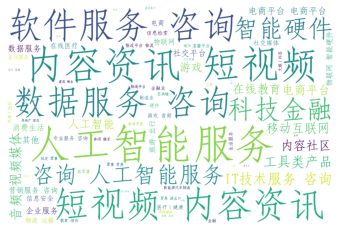

In [138]:
plt.imshow(wc)
# 隐藏图像坐标轴
plt.axis("off")
# 展示图片
plt.show()